1.Write a program to enter a string from user and perform following tasks
•Write a python functionnamed “Tokenize”which returnsthe tokenized string
•Print tokens along with the frequency of each tokenusing the above function
•Print the 5 least occurring tokens 

2.Write a program to enter a string from user and perform following tasks.
•Write a python functionnamed “RemoveStopWords”which returns the string after removing stop words
•Count frequency ofeach stop word present in a string using the above function
•Plot a bar graph depicting stop wordsand their frequencies 

3.Write a program to enter a string from user and perform following tasks
•Write a python functionnamed “Lemmatize”which returns a string after lemmatizing the string.
•Write a python functionnamed “Stemmed” which returns a string after stemming the string. (Use any stemmer of your preference)
•Print all the words along with their lemmatized and stemmed form using theabove functions
•Save these results in a csv file having 3 columns:Original WordLemmatized FormStemmed Form
    
4.Create a python file named “PreProcess” and perform the following tasks.
•Copy the function “Tokenize” in this file from question 1
•Copy thefunction “RemoveStopWords” in this file from question 2
•Copy the function “Lemmatize” in this file from question 3Create a function named “Refine” which accepts a string and call the above 3 functions in the same order i.e. first Tokenize then RemoveStopWords then Lemmatize.Remember:>Inputted string will be input to Tokenize Function> Tokenized String will be input to RemoveStopWords function> StopWordsRemoved string will be input to Lemmatize functionSave this python file as PreProcess and you can use this for upcoming assignments.


In [73]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
userinput = input("Enter a string to analyse:")

Enter a string to analyse:Write a program to enter a string from user and perform following tasks •Write a python functionnamed “Tokenize”which returnsthe tokenized string •Print tokens along with the frequency of each tokenusing the above function •Print the 5 least occurring tokens 


In [162]:
def Tokenize(userinput):
    word_tokens = word_tokenize(userinput)
    print("Number of Tokens: ",len(word_tokens))
    
    print("Frequency Distributions:")
    fdist = FreqDist()
    for token in word_tokens:
        fdist[token.lower()] +=1
        
    #print freq distributions   
    for freq in fdist:
        print(freq, fdist[freq])
    print()
    print("get 5 least frequent words:")   
    #get 5 least frequent words
    print(fdist.most_common()[-5:])
    
    return word_tokens

In [163]:
tokens = Tokenize(userinput)  

Number of Tokens:  42
Frequency Distributions:
write 1
a 3
program 1
to 1
enter 1
string 2
from 1
user 1
and 1
perform 1
following 1
tasks 1
•write 1
python 1
functionnamed 1
“ 1
tokenize 1
” 1
which 1
returnsthe 1
tokenized 1
•print 2
tokens 2
along 1
with 1
the 3
frequency 1
of 1
each 1
tokenusing 1
above 1
function 1
5 1
least 1
occurring 1

get 5 least frequent words:
[('above', 1), ('function', 1), ('5', 1), ('least', 1), ('occurring', 1)]


2.Write a program to enter a string from user and perform following tasks.
•Write a python functionnamed “RemoveStopWords”which returns the string after removing stop words
•Count frequency ofeach stop word present in a string using the above function
•Plot a bar graph depicting stop wordsand their frequencies 

In [55]:
import re

In [60]:
inpstr2 = input("Enter a string:")

Enter a string:Overall 7 years of Information Technology and Services experience with extensive experience in Robotic Process Automation using UiPath RPA Tools.  Experience in developing and managing RPA solutions using Robotic Enterprise Framework (REFramework), a framework for high quality automation delivery.  Experience in automating Field Service for Utility and Telecommunication Customers using Automation Agents.  Worked with Infosys Ltd. as a Senior Associate Consultant from December, 2015 to Now  Worked in Ericsson India Global Services Pvt Ltd as a Solution Integrator from November 2012 to December, 2015 (3 Years 2 Months). 


In [77]:
def RemoveStopWords(inpstr2):
    punctuations = re.compile(r'[-.?!,:;()|0-9]')
    post_punc = []
    stopwords =[]
    stopword_counts = []
    fdist = FreqDist()
    for word_token in word_tokenize(inpstr2):
        word = punctuations.sub("", word_token)
        if word_token != word:
            fdist[word_token]+=1
        if len(word)>0:
            post_punc.append(word)
    for stpword in fdist:
        print(stpword, fdist[stpword])
        stopwords.append(stpword)
        stopword_counts.append(fdist[stpword])
    plt.bar(stopwords,stopword_counts)
    return " ".join(post_punc) 

7 1
. 4
( 2
) 2
, 3
Ltd. 1
2015 2
2012 1
3 1
2 1


'Overall years of Information Technology and Services experience with extensive experience in Robotic Process Automation using UiPath RPA Tools \uf0d8 Experience in developing and managing RPA solutions using Robotic Enterprise Framework REFramework a framework for high quality automation delivery \uf0d8 Experience in automating Field Service for Utility and Telecommunication Customers using Automation Agents \uf0d8 Worked with Infosys Ltd as a Senior Associate Consultant from December to Now \uf0d8 Worked in Ericsson India Global Services Pvt Ltd as a Solution Integrator from November to December Years Months'

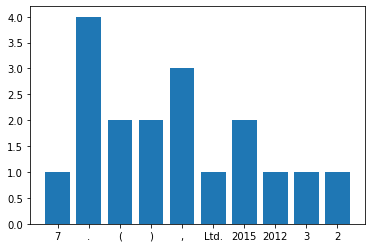

In [78]:
RemoveStopWords(inpstr2)

3.Write a program to enter a string from user and perform following tasks
•Write a python functionnamed “Lemmatize”which returns a string after lemmatizing the string.
•Write a python functionnamed “Stemmed” which returns a string after stemming the string. (Use any stemmer of your preference)
•Print all the words along with their lemmatized and stemmed form using theabove functions
•Save these results in a csv file having 3 columns:Original WordLemmatized FormStemmed Form

In [104]:
from nltk.stem import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

In [146]:
inpstr3 = input("Enter input string: ")

Enter input string: Write a program to enter


In [173]:
def get_wordnet_pos(treebank_tag):
        """
        return WORDNET POS compliance to WORDENT lemmatization (a,n,r,v) 
        """
        #if treebank_tag.startswith('J'):
            #return wordnet.ADJ
        #elif treebank_tag.startswith('V'):
            #return wordnet.VERB
        if treebank_tag.startswith('N'):
            return wordnet.NOUN
        #elif treebank_tag.startswith('R'):
            #return wordnet.ADV
        else:
            # As default pos in lemmatization is Noun
            return wordnet.NOUN

In [151]:
def Lemmatize(inpstr3):
    word_lem = WordNetLemmatizer()
    for word_token in word_tokenize(inpstr3):
        postagged = pos_tag([word_token])
        print(postagged[0][1])
        posval = get_wordnet_pos(postagged[0][1])
        print(word_token + ": "+ word_lem.lemmatize(word_token, posval)) 

In [152]:
Lemmatize(inpstr3)

VB
Write: Write
DT
a: a
NN
program: program
TO
to: to
NN
enter: enter


In [157]:
from nltk.stem import PorterStemmer
def Stemmed(inpstr3):
    ps = PorterStemmer()
    for word in word_tokenize(inpstr3):
        print(word+": "+ps.stem(word))

In [158]:
Stemmed(inpstr3)

Write: write
a: a
program: program
to: to
enter: enter


In [160]:
def ExportToCSV(inpstr3):
    word_lem = WordNetLemmatizer()
    ps = PorterStemmer()
    word_lst = []
    stemed_lst =[]
    lemm_lst = []
    for word_token in word_tokenize(inpstr3):
        word_lst.append(word_token)
        stemed_lst.append(ps.stem(word_token))
        postagged = pos_tag([word_token])
        #print(postagged[0][1])
        posval = get_wordnet_pos(postagged[0][1])
        #print(word_token + ": "+ word_lem.lemmatize(word_token, posval))
        lemm_lst.append(word_lem.lemmatize(word_token, posval))
    data = {'Word':word_lst, "Stemmed": stemed_lst, "Lemmitized": lemm_lst}
    df = pd.DataFrame(data)
    df.to_csv("file1.csv")
    

In [161]:
ExportToCSV(inpstr3)

4.Create a python file named “PreProcess” and perform the following tasks.
>Copy the function “Tokenize” in this file from question 1
>Copy thefunction “RemoveStopWords” in this file from question 2
>Copy the function “Lemmatize” in this file from question 3Create a function named “Refine” which accepts a string and call the above 3 functions in the same order i.e. first Tokenize then RemoveStopWords then Lemmatize.Remember:>Inputted string will be input to Tokenize Function> Tokenized String will be input to RemoveStopWords function> StopWordsRemoved string will be input to Lemmatize functionSave this python file as PreProcess and you can use this for upcoming assignments.

In [174]:
def Tokenize(userinput):
    word_tokens = word_tokenize(userinput)
    print("Number of Tokens: ",len(word_tokens))
    
    print("Frequency Distributions:")
    fdist = FreqDist()
    for token in word_tokens:
        fdist[token.lower()] +=1
        
    #print freq distributions   
    for freq in fdist:
        print(freq, fdist[freq])
    print()
    print("get 5 least frequent words:")   
    #get 5 least frequent words
    print(fdist.most_common()[-5:])
    
    return word_tokens

def RemoveStopWords(word_tokens):
    punctuations = re.compile(r'[-.?!,:;()|0-9]')
    post_punc = []
    stopwords =[]
    stopword_counts = []
    fdist = FreqDist()
    for word_token in word_tokens:
        word = punctuations.sub("", word_token)
        if word_token != word:
            fdist[word_token]+=1
        if len(word)>0:
            post_punc.append(word)
    for stpword in fdist:
        print(stpword, fdist[stpword])
        stopwords.append(stpword)
        stopword_counts.append(fdist[stpword])
    plt.bar(stopwords,stopword_counts)
    return " ".join(post_punc) 

def Lemmatize(inpstr3):
    word_lem = WordNetLemmatizer()
    for word_token in word_tokenize(inpstr3):
        postagged = pos_tag([word_token])
        print(postagged[0][1])
        posval = get_wordnet_pos(postagged[0][1])
        print(word_token + ": "+ word_lem.lemmatize(word_token, posval)) 

def Refine():
    userinput = input("Enter input string: ")
    word_tokens = Tokenize(userinput)
    strwostopwords = RemoveStopWords(word_tokens)
    Lemmatize(strwostopwords)

Enter input string: Copy the function “Lemmatize” in this file from question 3Create a function named “Refine” which accepts a string and call the above 3 functions in the same order i.e. first Tokenize then RemoveStopWords then Lemmatize.Remember:>Inputted string will be input to Tokenize Function> Tokenized String will be input to RemoveStopWords function> StopWordsRemoved string will be input to Lemmatize functionSave this python file as PreProcess and you can use this for upcoming assignments.
Number of Tokens:  82
Frequency Distributions:
copy 1
the 3
function 4
“ 2
lemmatize 2
” 2
in 2
this 3
file 2
from 1
question 1
3create 1
a 2
named 1
refine 1
which 1
accepts 1
string 4
and 2
call 1
above 1
3 1
functions 1
same 1
order 1
i.e 1
. 2
first 1
tokenize 2
then 2
removestopwords 2
lemmatize.remember 1
: 1
> 3
inputted 1
will 3
be 3
input 3
to 3
tokenized 1
stopwordsremoved 1
functionsave 1
python 1
as 1
preprocess 1
you 1
can 1
use 1
for 1
upcoming 1
assignments 1

get 5 least frequ

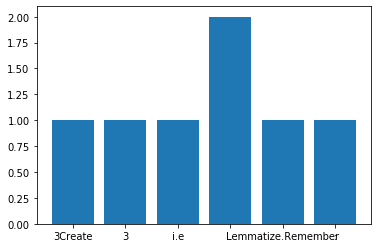

In [175]:
Refine()